# Using DNN from OpenCV: Better Perfomance than haarcascades 
But still not efficient enough

In [9]:
import numpy as np
from imutils.video import VideoStream
import time
import imutils
import cv2
print("imported")

imported


# cv's dnn module
1.It is based on Single-Shot-Multibox detector and uses ResNet-10 Architecture as backbone. The model was trained using images available from the web, but the source is not disclosed. OpenCV provides 2 models for this face detector.
However, the biggest problem with OpenCV’s dnn module was a lack of NVIDIA GPU/CUDA support




# readNetfromCaffe
Reads a network model stored in Caffe framework's format.

Parameters::


1.prototxt	path to the .prototxt file with text description of the network architecture.

2.caffeModel	path to the .caffemodel file with learned network.

Returns::


Net object.

In [3]:
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe("C:\\MyLearnings\\DeepLearning\\Facial Projects\\Face Detection\\deep-learning-face-detection\\deep-learning-face-detection\\deploy.prototxt.txt","C:\\MyLearnings\\DeepLearning\\Facial Projects\\Face Detection\\deep-learning-face-detection\\deep-learning-face-detection\\res10_300x300_ssd_iter_140000.caffemodel")
print("loaded")

[INFO] loading model...
loaded


# Inference

1.Capture Video using OpenCV's VideoCapture (0 ll stream your default camera)

2.Resize it

3.BlobFromImage : Now the next step is to load images in a batch and run them through the network. For this, we use the cv2.dnn.blobFromImage method. This method creates 4-dimensional blob from input images. 
 Optionally resizes and crops @p image from center.
 
 Basics of Caffe Model
 =====================
 Deep networks are compositional models that are naturally represented as a collection of inter-connected layers that work on chunks of data. Caffe defines a net layer-by-layer in its own model schema. The network defines the entire model bottom-to-top from input data to loss. As data and derivatives flow through the network in the forward and backward passes Caffe stores, communicates, and manipulates the information as blobs: the blob is the standard array and unified memory interface for the framework. The layer comes next as the foundation of both model and computation. The net follows as the collection and connection of layers. The details of blob describe how information is stored and communicated in and across layers and nets.
 
 
 A layer takes input through bottom connections and makes output through top connections.
 
 
 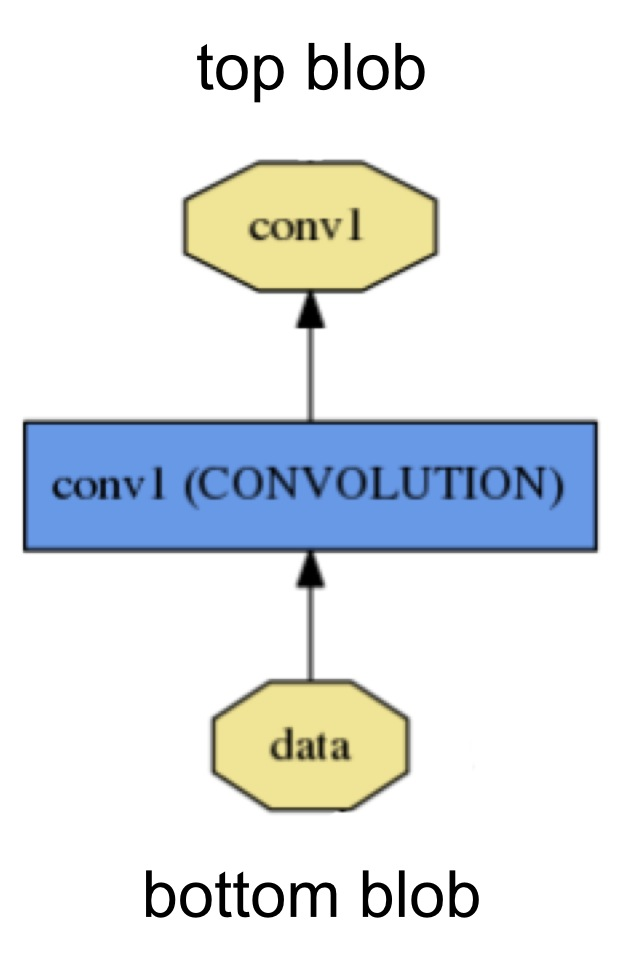
 Each layer type defines three critical computations: setup, forward, and backward.

Setup: initialize the layer and its connections once at model initialization.
Forward: given input from bottom compute the output and send to the top.
Backward: given the gradient w.r.t. the top output compute the gradient w.r.t. to the input and send to the bottom. A layer with parameters computes the gradient w.r.t. to its parameters and stores it internally.


(Here only forward as this isnt training, its just inference)


# Detections

The output from forward pass,  output [0,0,i,x]


i is the ith face detected in the image, of total n number of faces in the image


x = 2: confidence score

x =3,4,5,6 : box coordinates

In [8]:
# For video Streaming 
cap = cv2.VideoCapture(0)
#vs = VideoStream(src=0).start()

while True:
    img,frame = cap.read()
    #frame = vs.read()
    frame = imutils.resize(frame, width=400)
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))
 
    # pass the blob through the network and obtain the detections and
    # predictions
    net.setInput(blob)
    detections = net.forward()
    
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence < 0.7:
            continue
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(frame, (startX, startY), (endX, endY),
            (0, 0, 255), 2)
        cv2.putText(frame, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
 
        # if the `q` key was pressed, break from the loop
        #if key == ord("q"):
         #   break
    if key == ord('q'):
        break
    
            

            
cap.release()
cv2.destroyAllWindows()
